# Neural Network implementation project

## Imporing required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## loading dataset

In [2]:
def load_dataset(dataset):
    df = pd.read_csv(dataset)
    X = df.drop('target', axis=1)
    y = df.get('target')
    #X = (X-X.mean())/X.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)
    X_train = X_train.T
    y_train = y_train.values.reshape(1,y_train.values.shape[0])
    X_test = X_test.T
    y_test = y_test.values.reshape(1,y_test.values.shape[0])
    
    return X_train,y_train,X_test,y_test

In [3]:
X_train,y_train,X_test,y_test = load_dataset("heart.csv")

## Initializing Parameters

In [4]:
def initialize_parameters(layer_dims):
    np.random.seed(0)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

## Forward propagation

In [5]:
def forward_propagation(X,parameters):
    linear = {}
    activations = {}
    activations["A0"] = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    A_prev = activations["A"+str(L-1)]
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],A_prev)+parameters["b"+str(L)]
    activations["A"+str(L)] = 1/(1+np.exp(-linear["Z"+str(L)]))
    return linear,activations

## Computing Cost function

In [6]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))/m
    
    return cost

## Backward propagation

In [7]:
def backward_propagation(AL, Y, linear,activations,parameters):
    grads = {}
    L = len(linear)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    grads["dZ"+str(L)] = AL-Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ"+str(L)],activations["A"+str(L)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ"+str(L)],axis=1, keepdims=True)
    for l in reversed(range(L-1)):
        s = 1/(1+np.exp(-linear["Z"+str(l+1)]))
        grads["dZ"+str(l+1)] = np.dot(parameters['W'+str(l+2)].T,grads["dZ"+str(l+2)])*s*(1-s)
        grads["dW" + str(l + 1)] = 1./m * np.dot(grads["dZ"+str(l+1)],activations["A"+str(l)].T)
        grads["db" + str(l + 1)] = 1./m * np.sum(grads["dZ"+str(l+1)],axis=1, keepdims=True)
    return grads

## Updating the parameters

In [8]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

## Optimization function

In [9]:
def optimize(X, Y, layers_dims, learning_rate, num_iterations = 2500, print_cost=False,model_name = "Neural Network"):

    np.random.seed(1)
    costs = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):
        
        linear,activations = forward_propagation(X_train,parameters)
        L = len(parameters) // 2
        grads = backward_propagation(activations["A"+str(L)],y_train,linear,activations,parameters)
        cost = compute_cost(activations["A"+str(L)],Y)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    print ("Cost after iteration %i: %f" %(i, cost))
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(model_name+" at Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,costs

Cost after iteration 0: 0.848451
Cost after iteration 1000: 0.629480
Cost after iteration 2000: 0.621832
Cost after iteration 3000: 0.579432
Cost after iteration 4000: 0.575191
Cost after iteration 5000: 0.569333
Cost after iteration 6000: 0.563770
Cost after iteration 7000: 0.558501
Cost after iteration 7499: 0.558890


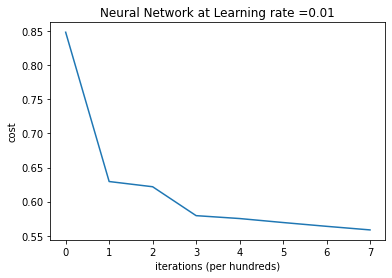

In [10]:
parameters,costs = optimize(X_train, y_train, [X_train.shape[0],20,20,1], learning_rate = 0.01, num_iterations = 7500, print_cost=True)

In [11]:
parameters["W3"].shape

(1, 20)

In [12]:
linear,activations = forward_propagation(X_test[225].values.reshape(13,1),parameters)
activations["A3"].shape

(1, 1)

Cost after iteration 0: 0.785711
Cost after iteration 1000: 0.689870
Cost after iteration 2000: 0.688116
Cost after iteration 3000: 0.686408
Cost after iteration 4000: 0.684765
Cost after iteration 5000: 0.683211
Cost after iteration 6000: 0.681766
Cost after iteration 7000: 0.680440
Cost after iteration 8000: 0.679232
Cost after iteration 9000: 0.678141
Cost after iteration 10000: 0.677157
Cost after iteration 11000: 0.676267
Cost after iteration 12000: 0.675208
Cost after iteration 13000: 0.674330
Cost after iteration 14000: 0.673219
Cost after iteration 14999: 0.672128


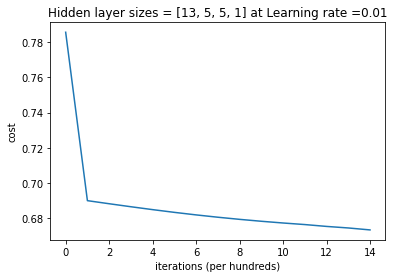

Cost after iteration 0: 0.659518
Cost after iteration 1000: 0.643742
Cost after iteration 2000: 0.637674
Cost after iteration 3000: 0.631155
Cost after iteration 4000: 0.625169
Cost after iteration 5000: 0.620723
Cost after iteration 6000: 0.614333
Cost after iteration 7000: 0.608677
Cost after iteration 8000: 0.605034
Cost after iteration 9000: 0.602074
Cost after iteration 10000: 0.599895
Cost after iteration 11000: 0.597640
Cost after iteration 12000: 0.595983
Cost after iteration 13000: 0.594492
Cost after iteration 14000: 0.592541
Cost after iteration 14999: 0.590804


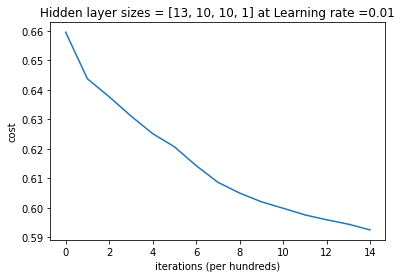

Cost after iteration 0: 0.848451
Cost after iteration 1000: 0.629480
Cost after iteration 2000: 0.621832
Cost after iteration 3000: 0.579432
Cost after iteration 4000: 0.575191
Cost after iteration 5000: 0.569333
Cost after iteration 6000: 0.563770
Cost after iteration 7000: 0.558501
Cost after iteration 8000: 0.553577
Cost after iteration 9000: 0.560457
Cost after iteration 10000: 0.556753
Cost after iteration 11000: 0.555338
Cost after iteration 12000: 0.537770
Cost after iteration 13000: 0.556936
Cost after iteration 14000: 0.547460
Cost after iteration 14999: 0.551939


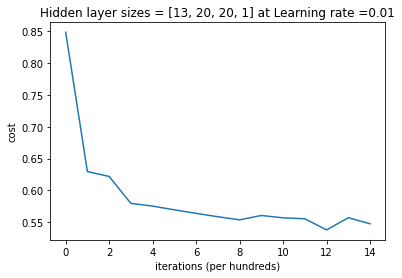

<ipython-input-5-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-7-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 0.783057
Cost after iteration 1000: 0.622819
Cost after iteration 2000: 0.602677
Cost after iteration 3000: 0.590335
Cost after iteration 4000: 0.581896
Cost after iteration 5000: 0.545577
Cost after iteration 6000: 0.536516
Cost after iteration 7000: 0.539639
Cost after iteration 8000: 0.530962
Cost after iteration 9000: 0.529728
Cost after iteration 10000: 0.519722
Cost after iteration 11000: 0.514265
Cost after iteration 12000: 0.503620
Cost after iteration 13000: 0.486322
Cost after iteration 14000: 0.483776
Cost after iteration 14999: 0.486797


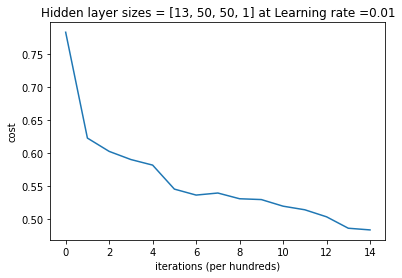

<ipython-input-5-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-7-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 2.841881
Cost after iteration 1000: 0.548109
Cost after iteration 2000: 0.527399
Cost after iteration 3000: 0.515685
Cost after iteration 4000: 0.510398
Cost after iteration 5000: 0.501155
Cost after iteration 6000: 0.498851
Cost after iteration 7000: 0.501931
Cost after iteration 8000: 0.503130
Cost after iteration 9000: 0.505461
Cost after iteration 10000: 0.506210
Cost after iteration 11000: 0.505164
Cost after iteration 12000: 0.502511
Cost after iteration 13000: 0.497776
Cost after iteration 14000: 0.487083
Cost after iteration 14999: 0.455708


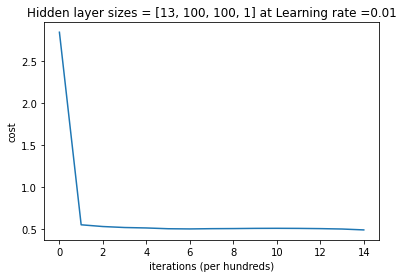

<ipython-input-5-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-7-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 2.078157
Cost after iteration 1000: 0.506041
Cost after iteration 2000: 0.467491
Cost after iteration 3000: 0.454760
Cost after iteration 4000: 0.438118
Cost after iteration 5000: 0.432058
Cost after iteration 6000: 0.439315
Cost after iteration 7000: 0.434199
Cost after iteration 8000: 0.434853
Cost after iteration 9000: 0.423381
Cost after iteration 10000: 0.426246
Cost after iteration 11000: 0.432374
Cost after iteration 12000: 0.429086
Cost after iteration 13000: 0.420767
Cost after iteration 14000: 0.423785
Cost after iteration 14999: 0.419450


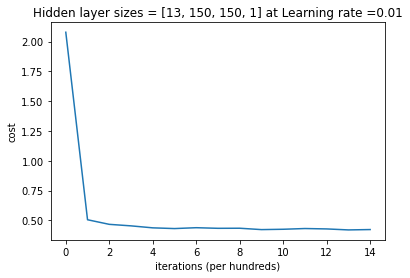

<ipython-input-5-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-7-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 1.848325
Cost after iteration 1000: 0.467785
Cost after iteration 2000: 0.460292
Cost after iteration 3000: 0.467293
Cost after iteration 4000: 0.462439
Cost after iteration 5000: 0.457573
Cost after iteration 6000: 0.423846
Cost after iteration 7000: 0.429309
Cost after iteration 8000: 0.425306
Cost after iteration 9000: 0.420578
Cost after iteration 10000: 0.420958
Cost after iteration 11000: 0.424710
Cost after iteration 12000: 0.416544
Cost after iteration 13000: 0.411062
Cost after iteration 14000: 0.405796
Cost after iteration 14999: 0.403007


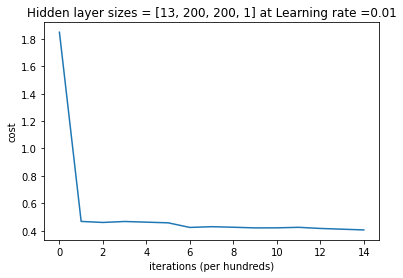

<ipython-input-5-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-7-286ab35a1fa0>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 0.866593
Cost after iteration 1000: 0.385026
Cost after iteration 2000: 0.389515
Cost after iteration 3000: 0.385495
Cost after iteration 4000: 0.385998
Cost after iteration 5000: 0.386492
Cost after iteration 6000: 0.376224
Cost after iteration 7000: 0.381828
Cost after iteration 8000: 0.380614
Cost after iteration 9000: 0.377119
Cost after iteration 10000: 0.380348
Cost after iteration 11000: 0.379726
Cost after iteration 12000: 0.378161
Cost after iteration 13000: 0.368721
Cost after iteration 14000: 0.367401
Cost after iteration 14999: 0.365715


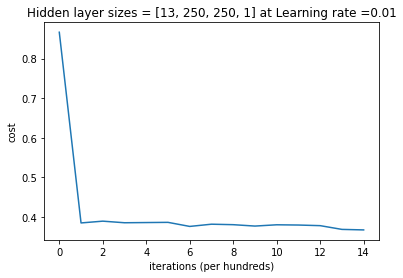

In [13]:
diff_hidden_layers_size = [[X_train.shape[0],5,5,1],[X_train.shape[0],10,10,1],
                           [X_train.shape[0],20,20,1],[X_train.shape[0],50,50,1],
                           [X_train.shape[0],100,100,1],[X_train.shape[0],150,150,1],
                           [X_train.shape[0],200,200,1],[X_train.shape[0],250,250,1]]

diff_hidden_layers_parameters = {}
diff_hidden_layers_costs = {}

for hidden_layer in diff_hidden_layers_size:
    model_name = "Hidden layer sizes = "+str(hidden_layer)
    parameters,cost = optimize(X_train, y_train, hidden_layer, learning_rate = 0.01, num_iterations = 15000, print_cost=True,model_name = model_name)
    diff_hidden_layers_parameters["NN"+str(hidden_layer)] = parameters
    diff_hidden_layers_costs["NN"+str(hidden_layer)] = cost

In [14]:
diff_hidden_layers_costs

{'NN[13, 5, 5, 1]': [0.785710791065413,
  0.6898703547101519,
  0.6881161277448098,
  0.6864080545094361,
  0.6847647523873934,
  0.6832109217788398,
  0.6817663862188741,
  0.6804399905219173,
  0.679232072149099,
  0.6781405439519894,
  0.6771572611560225,
  0.6762673876022427,
  0.6752084331210667,
  0.6743302220822405,
  0.6732194029763217],
 'NN[13, 10, 10, 1]': [0.6595181514210269,
  0.6437419409574866,
  0.6376736282263032,
  0.6311553789734053,
  0.6251690835264371,
  0.6207225708094537,
  0.6143328812796666,
  0.6086768924260457,
  0.6050344944534879,
  0.6020739791138391,
  0.5998948791695573,
  0.5976395846121971,
  0.5959827135248819,
  0.5944921482864622,
  0.5925409144236724],
 'NN[13, 20, 20, 1]': [0.8484514508505218,
  0.6294803717582624,
  0.6218318422463086,
  0.5794321851068622,
  0.5751914542898424,
  0.5693331428223212,
  0.5637700738483895,
  0.5585014427649286,
  0.5535774307852044,
  0.5604573450300272,
  0.5567526993296879,
  0.5553380121199021,
  0.53777011491

## Using model for prediction

In [56]:
def model_predict(x,parameters):
    activations["A0"] = x
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],activations["A"+str(l)])+parameters["b"+str(L)]
    #print(linear["Z"+str(L)].shape)
    y = 1/(1+np.exp(-linear["Z"+str(L)]))
    return y

In [57]:
def predict(x,parameters):
    y = model_predict(x,parameters)
    y[y>=0.5] = 1
    y[y<0.5] = 0
    return y

In [19]:
predictions = predict(X_train,diff_hidden_layers_parameters["NN[13, 250, 250, 1]"])
predictions = predictions.astype(int)
predictions

(1, 212)


<ipython-input-15-426a5815e97a>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


array([[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]])

## Accuracy scores of different size networks

In [64]:
diff_networks_accuracy_score_training_dataset = {}
for network in diff_hidden_layers_parameters:
    predictions = predict(X_train,diff_hidden_layers_parameters[network]).astype(int)
    test_score = y_train-predictions
    TPandTN = []
    for element in test_score.T:
        if element == 0:
            TPandTN.append(element)
    diff_networks_accuracy_score_training_dataset[network] = len(TPandTN)/y_train.shape[1]

<ipython-input-56-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


In [65]:
diff_networks_accuracy_score_training_dataset

{'NN[13, 5, 5, 1]': 0.6320754716981132,
 'NN[13, 10, 10, 1]': 0.7028301886792453,
 'NN[13, 20, 20, 1]': 0.75,
 'NN[13, 50, 50, 1]': 0.6981132075471698,
 'NN[13, 100, 100, 1]': 0.7924528301886793,
 'NN[13, 150, 150, 1]': 0.8301886792452831,
 'NN[13, 200, 200, 1]': 0.8160377358490566,
 'NN[13, 250, 250, 1]': 0.839622641509434}

In [66]:
diff_networks_accuracy_score_test_dataset = {}
for network in diff_hidden_layers_parameters:
    predictions = predict(X_test,diff_hidden_layers_parameters[network]).astype(int)
    test_score = y_test-predictions
    TPandTN = []
    for element in test_score.T:
        if element == 0:
            TPandTN.append(element)
    diff_networks_accuracy_score_test_dataset[network] = len(TPandTN)/y_train.shape[1]

<ipython-input-56-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


In [67]:
diff_networks_accuracy_score_test_dataset

{'NN[13, 5, 5, 1]': 0.2641509433962264,
 'NN[13, 10, 10, 1]': 0.27358490566037735,
 'NN[13, 20, 20, 1]': 0.28773584905660377,
 'NN[13, 50, 50, 1]': 0.2688679245283019,
 'NN[13, 100, 100, 1]': 0.3113207547169811,
 'NN[13, 150, 150, 1]': 0.2641509433962264,
 'NN[13, 200, 200, 1]': 0.2688679245283019,
 'NN[13, 250, 250, 1]': 0.25}

In [78]:
import pickle

In [80]:
for network in diff_hidden_layers_parameters:
    filename = network
    outfile = open(filename,'wb')
    pickle.dump(diff_hidden_layers_parameters[network],outfile)
    outfile.close()

In [88]:
accuracies = []
for network in diff_networks_accuracy_score_training_dataset:
    accuracies.append(diff_networks_accuracy_score_training_dataset[network])
accuracies

[0.6320754716981132,
 0.7028301886792453,
 0.75,
 0.6981132075471698,
 0.7924528301886793,
 0.8301886792452831,
 0.8160377358490566,
 0.839622641509434]

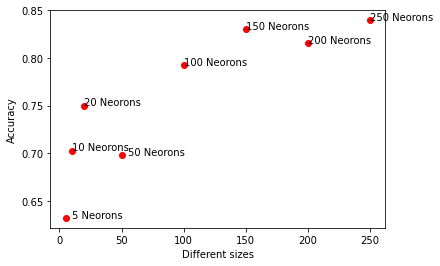

<Figure size 432x288 with 0 Axes>

In [100]:
#plt.axis([5,10,20,50,100,150,200,250])
plt.ylabel("Accuracy")
plt.xlabel("Different sizes")
plt.text(5+5,accuracies[0],"5 Neorons")
plt.text(10,accuracies[1],'10 Neorons')
plt.text(20,accuracies[2],'20 Neorons')
plt.text(50+5,accuracies[3],'50 Neorons')
plt.text(100,accuracies[4],'100 Neorons')
plt.text(150,accuracies[5],'150 Neorons')
plt.text(200,accuracies[6],'200 Neorons')
plt.text(250,accuracies[7],'250 Neorons')
plt.plot([5,10,20,50,100,150,200,250],accuracies,'ro')
plt.show()
plt.savefig('training.png')

In [102]:
test_accuracies = []
for network in diff_networks_accuracy_score_test_dataset:
    test_accuracies.append(diff_networks_accuracy_score_test_dataset[network])
test_accuracies

[0.2641509433962264,
 0.27358490566037735,
 0.28773584905660377,
 0.2688679245283019,
 0.3113207547169811,
 0.2641509433962264,
 0.2688679245283019,
 0.25]

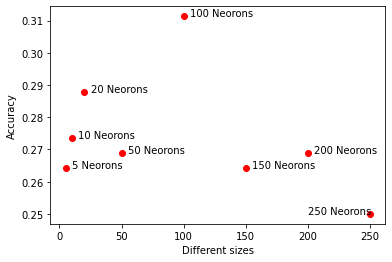

<Figure size 432x288 with 0 Axes>

In [106]:
plt.ylabel("Accuracy")
plt.xlabel("Different sizes")
plt.text(5+5,test_accuracies[0],"5 Neorons")
plt.text(10+5,test_accuracies[1],'10 Neorons')
plt.text(20+5,test_accuracies[2],'20 Neorons')
plt.text(50+5,test_accuracies[3],'50 Neorons')
plt.text(100+5,test_accuracies[4],'100 Neorons')
plt.text(150+5,test_accuracies[5],'150 Neorons')
plt.text(200+5,test_accuracies[6],'200 Neorons')
plt.text(250-50,test_accuracies[7],'250 Neorons')
plt.plot([5,10,20,50,100,150,200,250],test_accuracies,'ro')
plt.show()
plt.savefig('test.png')

In [109]:
from mpl_toolkits.mplot3d import Axes3D

<ipython-input-130-de40a3e9a381>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
<ipython-input-130-de40a3e9a381>:7: RuntimeWarning: divide by zero encountered in log
  return x*np.log(y)+(1-x)*np.log(1-y)
<ipython-input-130-de40a3e9a381>:7: RuntimeWarning: invalid value encountered in multiply
  return x*np.log(y)+(1-x)*np.log(1-y)
<ipython-input-130-de40a3e9a381>:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1)


AttributeError: 'Axes3D' object has no attribute 'savefig'

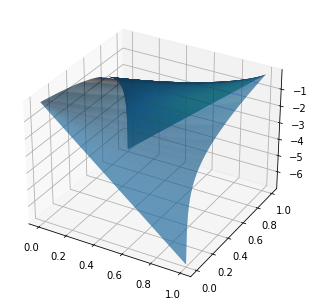

In [130]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0,1,0.001)
Y = np.arange(0,1,0.001)
X,Y = np.meshgrid(X,Y)
def f(x,y):
    return x*np.log(y)+(1-x)*np.log(1-y)
ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1)
ax.savefig('cost.png')